In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



In [43]:
'''
    THis functtion to load the data with any type
'''
def load_data(file_path,file_type):
        if file_type == 'csv':
            data = pd.read_csv(file_path)
        elif file_type == 'excel':
            data = pd.read_excel(file_path)
        elif file_type == 'sql':
            if db_connection is None:
                raise ValueError("Please provide a database connection string.")
            engine = create_engine(db_connection)
            query = "SELECT * FROM your_table_name"
            data = pd.read_sql(query, engine)
        else:
            raise ValueError("Unsupported file type.")

        return data

In [44]:
'''
      This function for Replacing  missing_values with mean, median, or mode 
      according to the user choice and return invalid if the input strategy is invalid 

'''

def replace_missing_values(data, strategy):
    if strategy.lower() == 'mean':
        filled_data = data.fillna(data.mean())
    elif strategy.lower() == 'median':
        filled_data = data.fillna(data.median())
    elif strategy.lower() == 'mode':
        filled_data = data.fillna(data.mode().iloc[0])
    else:
        print("Invalid strategy!")
        return "invalid"
    
    return filled_data


In [45]:


def encode_categorical_data(dataframe, algorithm):
    """
    Function to handle categorical data based on the specified encoding algorithm.
    
    Arguments:
    dataframe -- The pandas DataFrame containing the data
    algorithm -- A string specifying the encoding algorithm to be used
    
    Returns:
    The updated dataframe with encoded categorical columns
    """
    encoded_df = dataframe.copy()
    
    if algorithm == "one-hot":
        # Perform one-hot encoding
        encoded_df = pd.get_dummies(encoded_df)
        
    elif algorithm == "label":
        # Perform label encoding
        # You may need to install the scikit-learn library using pip install scikit-learn
        
        label_encoder = LabelEncoder()
        for column in encoded_df.columns:
            if encoded_df[column].dtype == 'object':
                encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
    
    # Add more elif conditions for other encoding algorithms
    
    return encoded_df


In [46]:
'''
    This function apply Scaling numerical features on the data with diffrent algorithms according to user choice
    
'''

def scale_features(data, scaling_algorithm):
    if scaling_algorithm == 'StandardScaler':
        # Initialize the StandardScaler object
        scaler = StandardScaler()

        # Scale the numerical features
        scaled_data = scaler.fit_transform(data)

    elif scaling_algorithm == 'MinMaxScaler':
        # Initialize the MinMaxScaler object
        scaler = MinMaxScaler()

        # Scale the numerical features
        scaled_data = scaler.fit_transform(data)

    elif scaling_algorithm == 'RobustScaler':
        # Initialize the RobustScaler object
        scaler = RobustScaler()

        # Scale the numerical features
        scaled_data = scaler.fit_transform(data)

    else:
        return 'Invalid scaling algorithm'

    # Create a new DataFrame with scaled features
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

    return scaled_df




In [47]:
'''
     This function for applying feature selection and dimensionality reduction algorithms on the data 
           according to the user choice and return invalid if the input algorithm is invalid 

'''
def select_features(data, algorithm):
    if algorithm not in ['randomforest', 'pca']:
        return 'invalid'
    
    X = data.drop('target', axis=1)  # Assuming 'target' is the target column
    y = data['target']

    if algorithm == 'randomforest':
        selector = SelectFromModel(RandomForestClassifier())
        selected_data = selector.fit_transform(X, y)
    elif algorithm == 'pca':
        pca = PCA(n_components=2)
        selected_data = pca.fit_transform(X, y)

    return pd.DataFrame(selected_data, columns=['PC1', 'PC2'])


In [48]:

'''
    This function to viualize data according to the user choice 
    and return invalid if the input strategy is invalid 

'''
def generate_visualization(data, plot_type, x, y):
    if plot_type == 'box':
        # Create a box plot
        plt.figure(figsize=(15, 6))
        sns.boxplot(data=data)
        plt.show()
        pass
        
    elif plot_type == 'scatter':
        # Create a scatter plot
        plt.figure(figsize=(15, 6))
        sns.scatterplot(data=data, x=x, y=y)  # Assuming 'x' and 'y' are column names
        plt.show()
        pass
        
    elif plot_type == 'subplot':
        # Create subplots (scatter and box plots)
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        sns.scatterplot(data=data, x=x, y=y, ax=axes[0])
        sns.boxplot(data=data, ax=axes[1])
        plt.show()
        pass
        
    elif plot_type == 'pie':
        # Create a pie chart
        plt.figure(figsize=(15,6))
        data[x].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.show()
        pass
    elif plot_type == 'bar':
        # Create a bar plot
        plt.figure(figsize=(15,6))
        sns.barplot(data=data, x=x, y=y)  # Assuming 'x' and 'y' are column names
        plt.show()
        pass
    elif plot_type == 'histogram':
        # Create a histogram
        plt.figure(figsize=(15,6))
        sns.histplot(data=data, x=x, bins=10)  # Assuming 'column' is the column name
        plt.show()
        pass
        
    elif plot_type == 'heatmap':
        # Create a heatmap
        plt.figure(figsize=(15,6))
        sns.heatmap(data.corr(),annot = True)
        plt.show()
        pass
        
    elif plot_type == 'bie':
        # Create a bie plot (bar plot with normalized counts)
        plt.figure(figsize=(15,6))
        data[x].value_counts(normalize=True).plot(kind='bar')
        plt.show()
        
    else:
        return 'invalid'




In [49]:
''''
   This function to  evaluate_model

'''
def evaluate_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Create a dictionary with evaluation results
    evaluation_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    return evaluation_results


In [50]:
'''
    This function to perform_automl take data  and the task we want to do and the target_variable 
    it will split data and choose the best model to use 
'''

def perform_automl(data, target_variable, task):
    # Split the data into features (X) and target variable (y)
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if task == 'classification':
        # Define a list of classification models
        models = [
            LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier()
        ]
    elif task == 'regression':
        # Define a list of regression models
        models = [
            LinearRegression(),
            DecisionTreeRegressor(),
            RandomForestRegressor()
        ]
    
    best_model = None
    best_score = 0
    
    # Iterate over each model and evaluate its performance
    for model in models:
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate the evaluation metric
        if task == 'classification':
            score = accuracy_score(y_test, y_pred)
        elif task == 'regression':
            score = mean_squared_error(y_test, y_pred)
        
        # Update the best model if the current model performs better
        if best_score is None or score > best_score:
            best_model = model
            best_score = score
    
    return best_model


In [51]:
data = load_data(r'F:\conda_projects\project2\data.csv','csv')


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [53]:
data =  replace_missing_values(data, strategy ='mean')


C:\Users\Skytop\AppData\Local\Temp\ipykernel_13468\1165830443.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  filled_data = data.fillna(data.mean())


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [55]:
''' this columns contains many null values ... if we drop it we will lose more data .. 
so the best solution is drop this columns 
'''
data = data.drop("Market Category",axis =1)

C:\Users\Skytop\AppData\Local\Temp\ipykernel_13468\1710694020.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


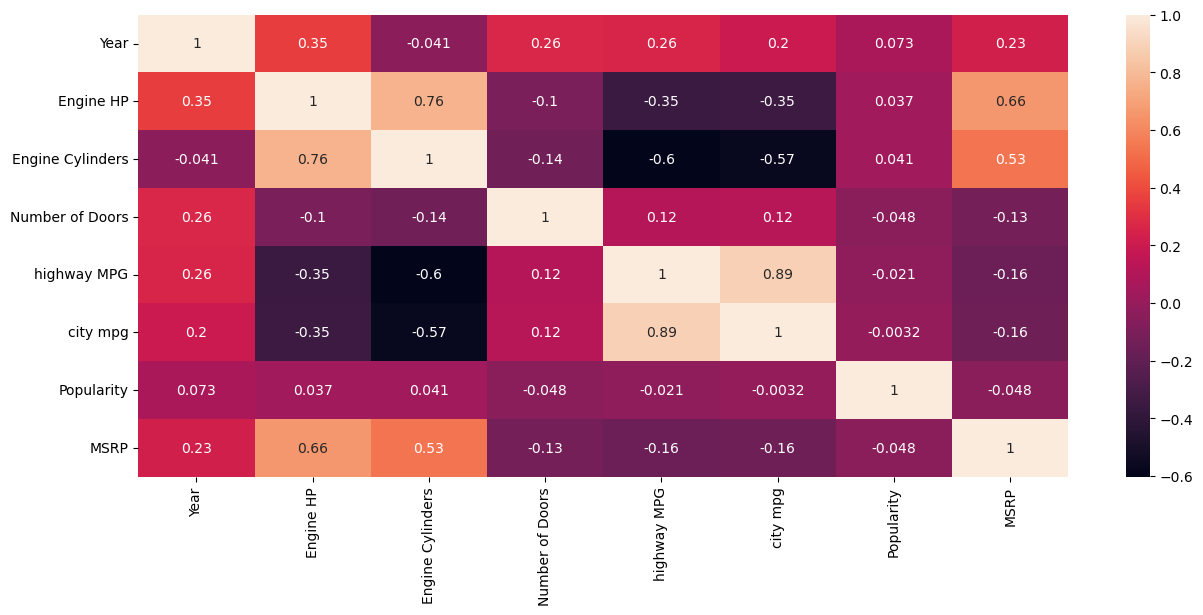

In [56]:
generate_visualization(data=data, plot_type='heatmap',x = None ,y= None)

In [57]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.386070,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875192,1.778316,0.881093,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


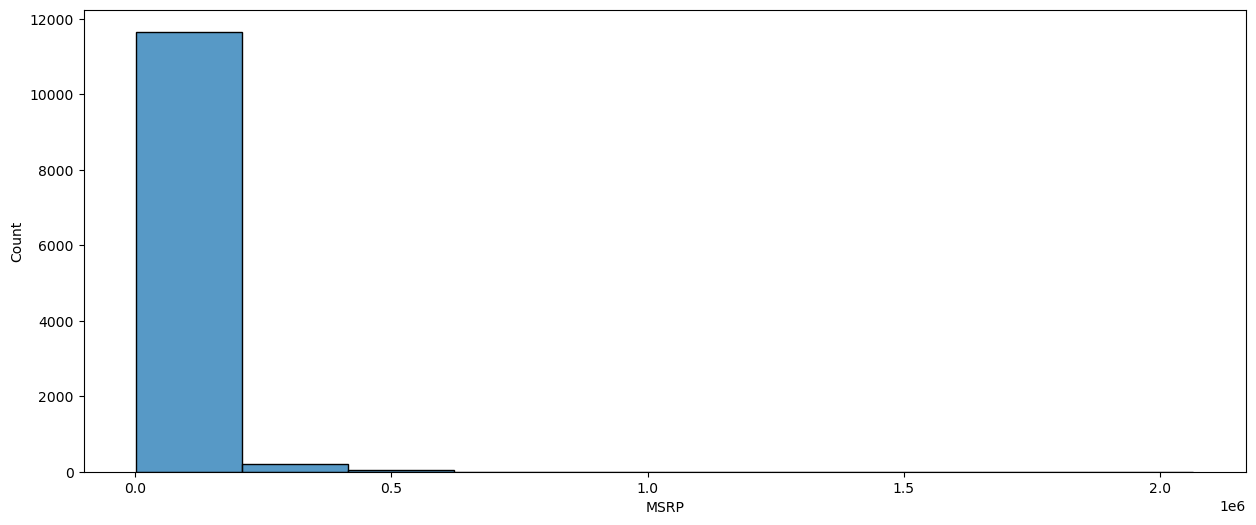

In [58]:
# handle outliers 
generate_visualization(data, plot_type = 'histogram', x='MSRP', y =None)

In [59]:
# drop values after 1e6
data = data[data["MSRP"]<1e6]

In [60]:
''' numerical features that are important 
    engine_hp and engine_cylinders both have high correlation with msrp and 
    the corr between  them  is 0.7  >> (<0.8) .. take them both 
    then we will handle outliears
'''
x=data [['Year','Engine HP','Engine Cylinders']]
y = data['MSRP']

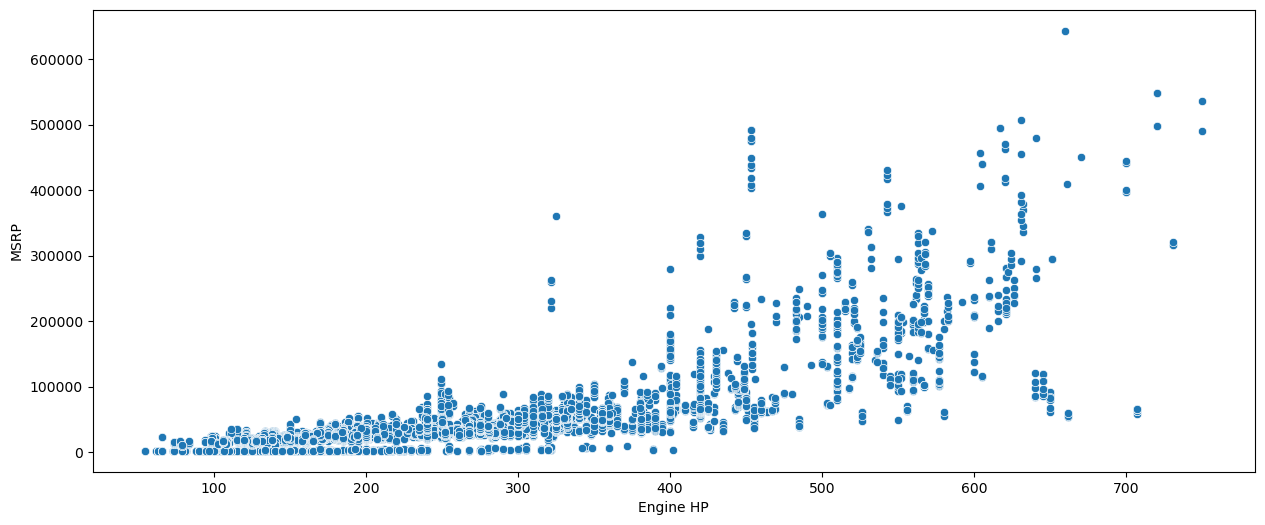

In [61]:
# show realatin between engine_hp and msrp 
generate_visualization(data, plot_type = 'scatter', x='Engine HP', y ='MSRP')

In [62]:
# clip data after 7000
data["Engine HP"] = np.where(data["Engine HP"]>700, 700, data["Engine HP"])

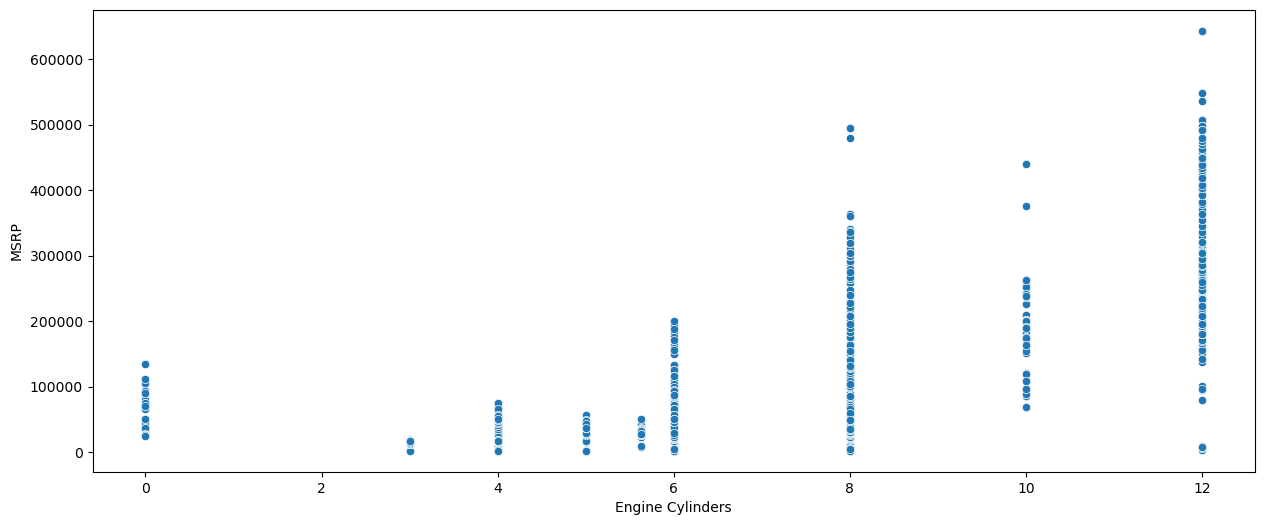

In [63]:
# show realatin between engine_cylinders and msrp 

generate_visualization(data, plot_type = 'scatter', x='Engine Cylinders', y ='MSRP')

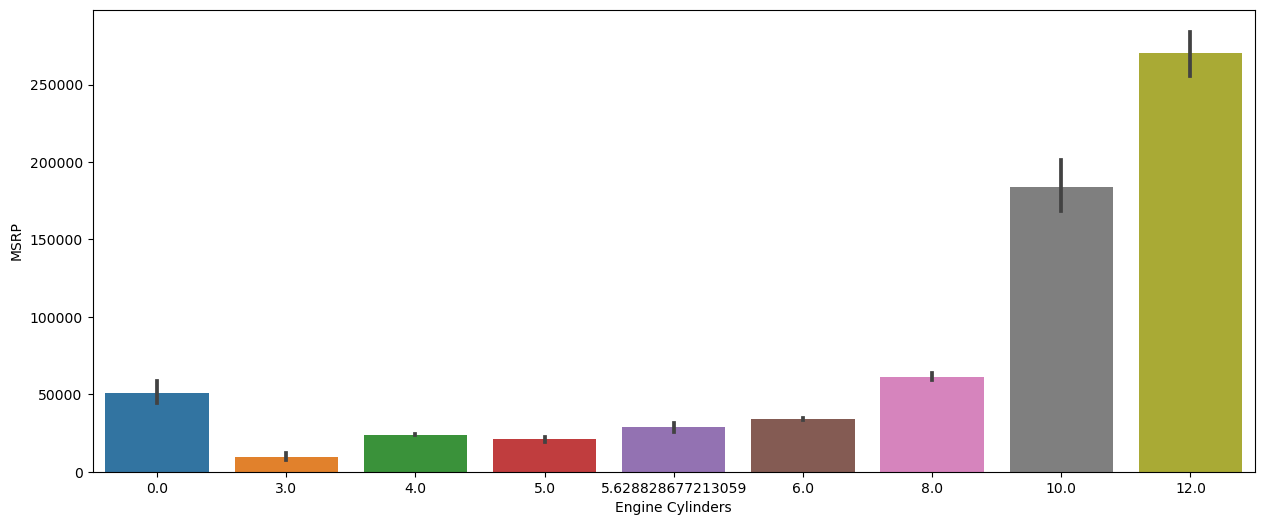

In [64]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Engine Cylinders', y = 'MSRP')


In [65]:
# note that there are cars with (0 cylinders)  and this is impossible >> so we will drop it 
data = data[data["Engine Cylinders"]!=0]

In [66]:
# so we finished numerical data >> now we will handle categorical data .... watch and learn 

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11852 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11852 non-null  object 
 1   Model              11852 non-null  object 
 2   Year               11852 non-null  int64  
 3   Engine Fuel Type   11849 non-null  object 
 4   Engine HP          11852 non-null  float64
 5   Engine Cylinders   11852 non-null  float64
 6   Transmission Type  11852 non-null  object 
 7   Driven_Wheels      11852 non-null  object 
 8   Number of Doors    11852 non-null  float64
 9   Vehicle Size       11852 non-null  object 
 10  Vehicle Style      11852 non-null  object 
 11  highway MPG        11852 non-null  int64  
 12  city mpg           11852 non-null  int64  
 13  Popularity         11852 non-null  int64  
 14  MSRP               11852 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


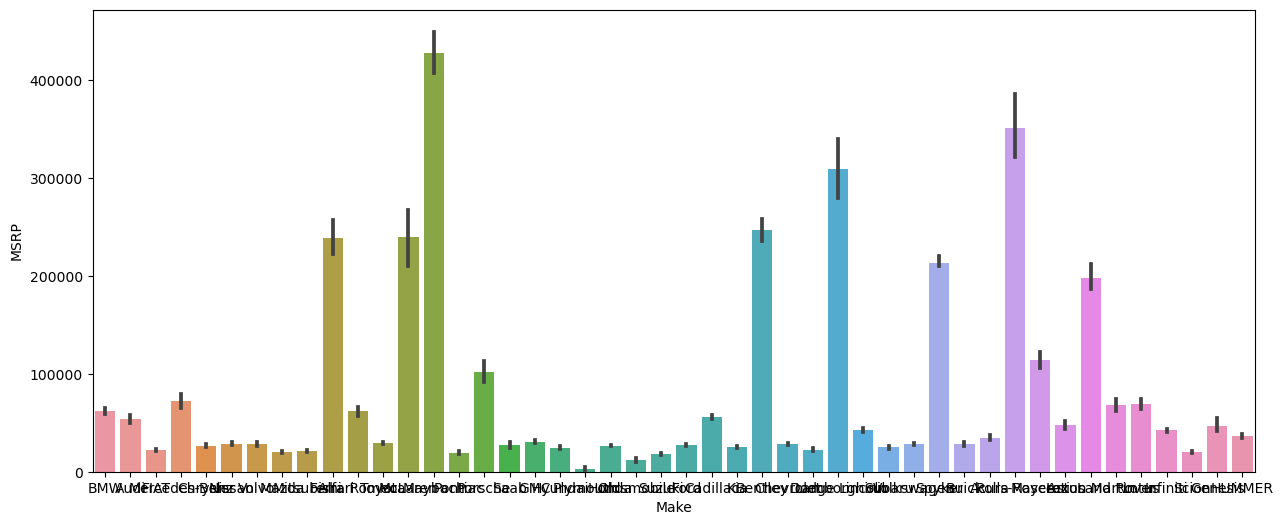

In [68]:
# show realation between make and msrp 
generate_visualization(data = data ,plot_type = 'bar', x = 'Make', y = 'MSRP')


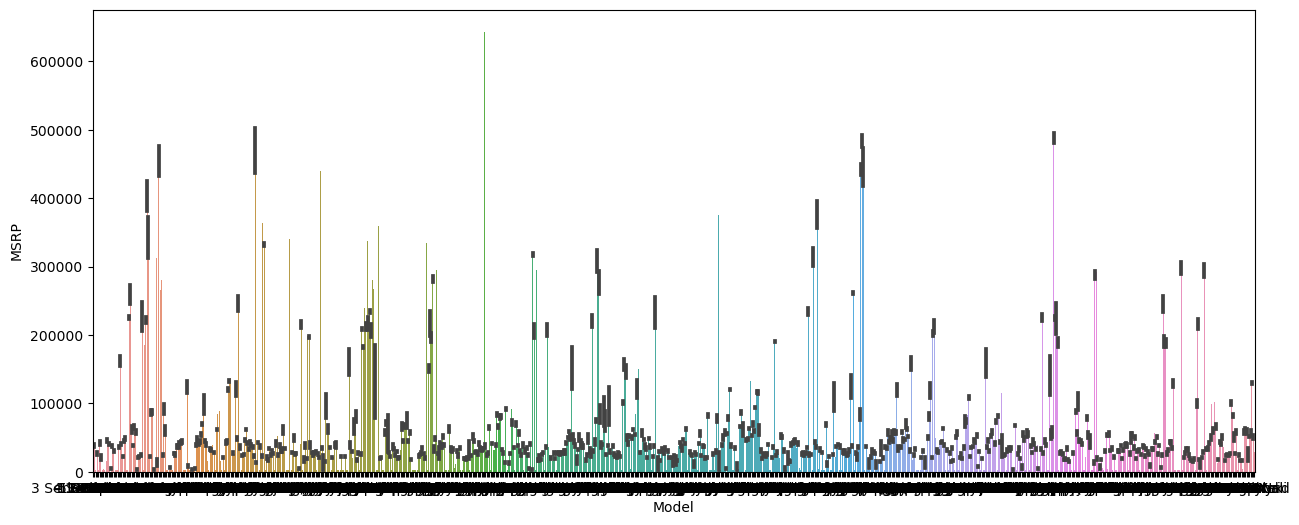

In [69]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Model', y = 'MSRP')


In [70]:
'''
     Note that there is high variation but so much (unique values ) (897) 
     so drop it 
'''
data= data.drop("Model",axis=1)

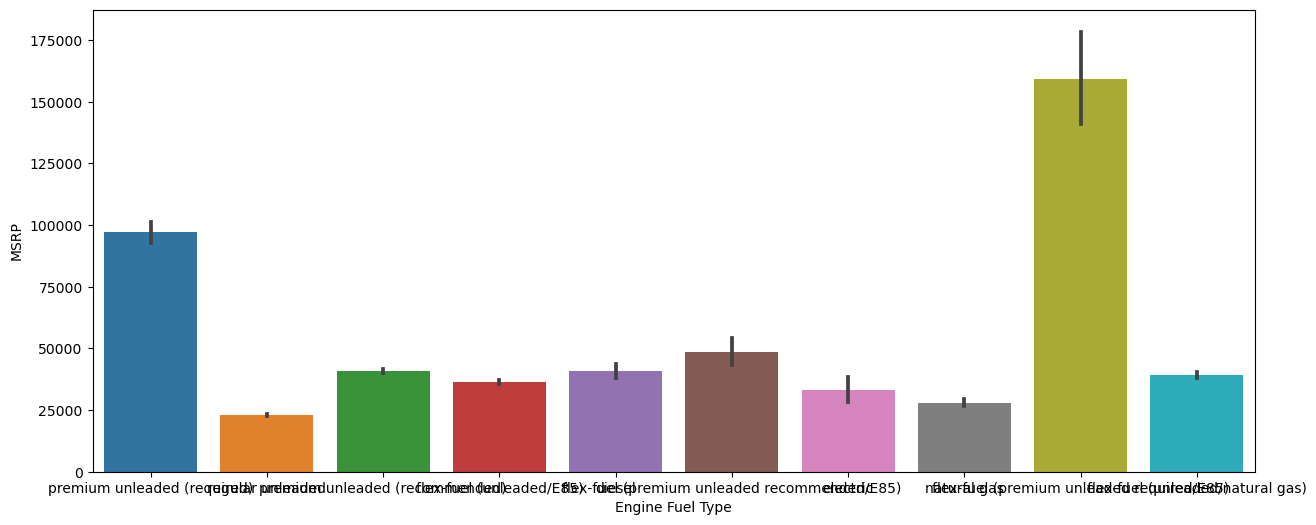

In [71]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Engine Fuel Type', y = 'MSRP')


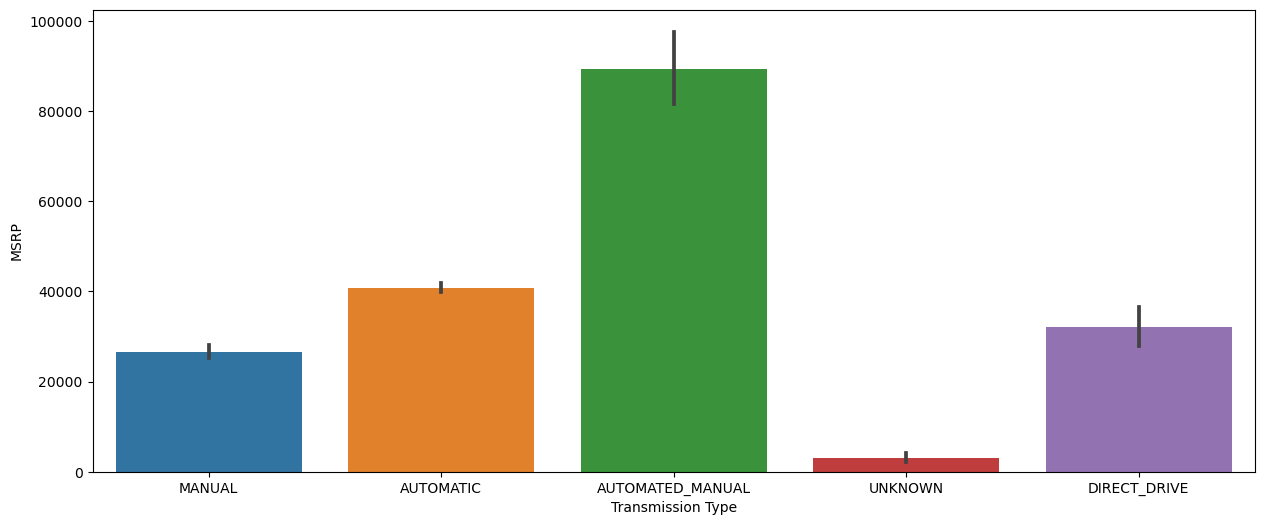

In [72]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Transmission Type', y = 'MSRP')
# variation with only 5 features >> take it 


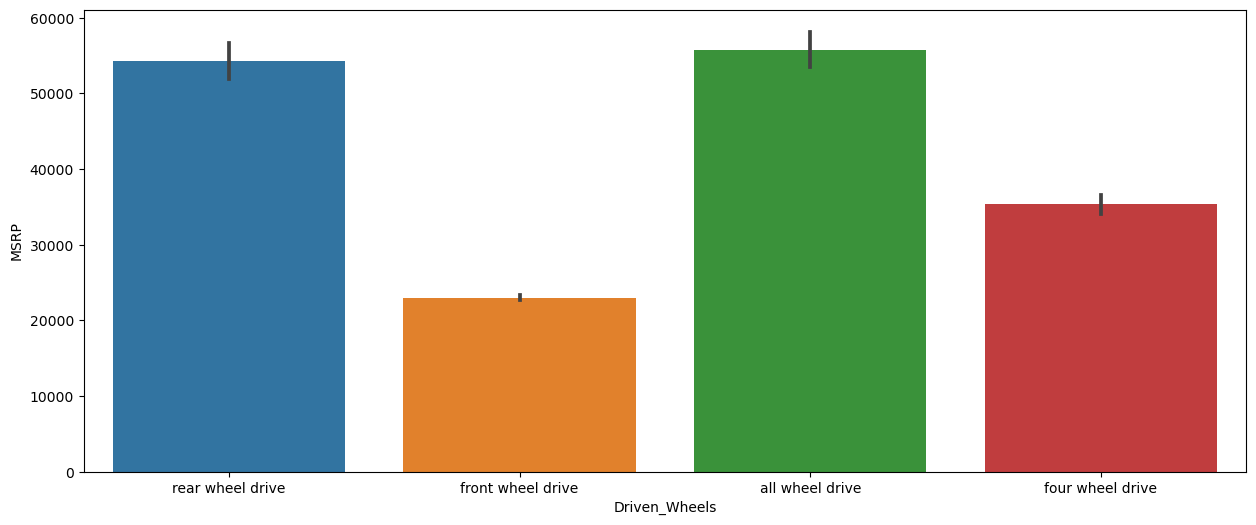

In [73]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Driven_Wheels', y = 'MSRP')


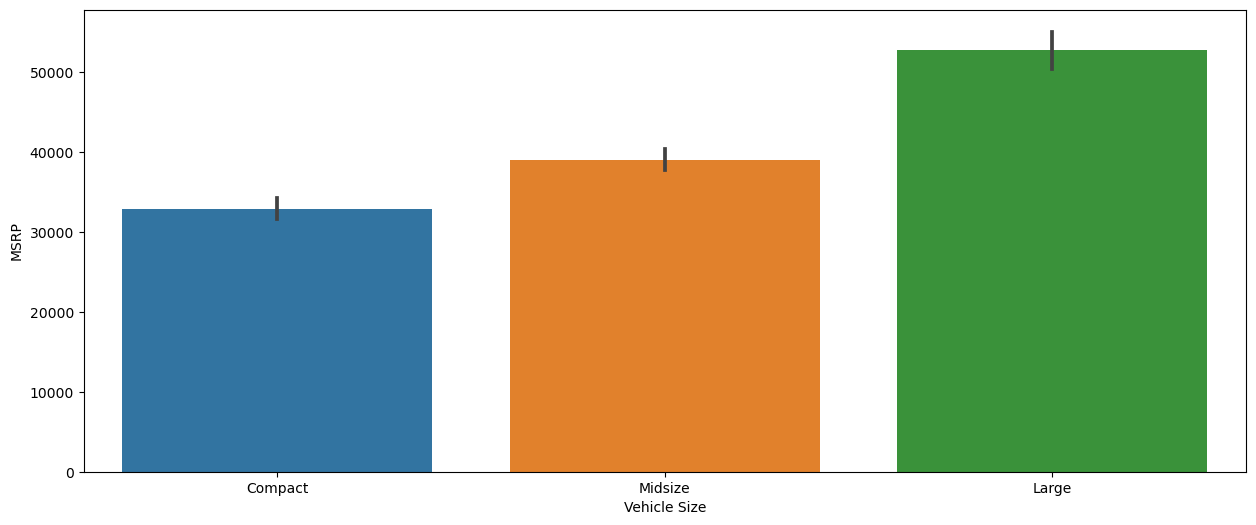

In [74]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Vehicle Size', y = 'MSRP')


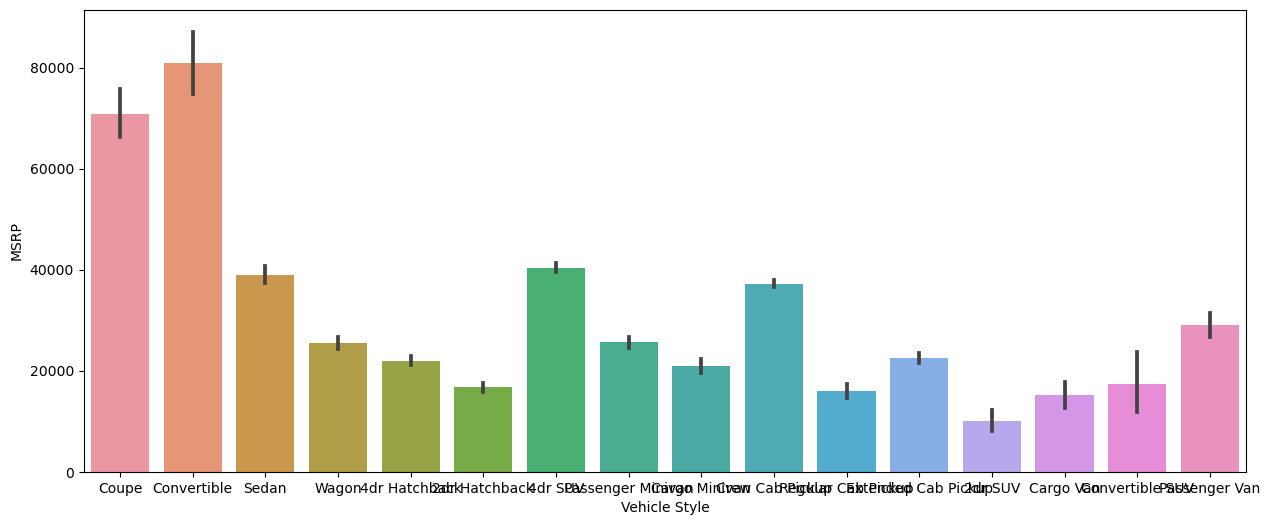

In [75]:
generate_visualization(data = data ,plot_type = 'bar', x = 'Vehicle Style', y = 'MSRP')


In [76]:
# handle categorical data
data = encode_categorical_data(data,'label')    

In [77]:
# feature selection
scale_features(data, scaling_algorithm = 'StandardScaler')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,-1.279758,0.084082,-0.015006,0.793441,0.201691,1.675616,1.152589,-1.626660,-1.108190,-0.073821,-0.041072,-0.048521,1.637092,0.130482
1,-1.279758,0.084082,-0.015006,0.469877,0.201691,1.675616,1.152589,-1.626660,-1.108190,-0.481236,0.232405,-0.048521,1.637092,0.018155
2,-1.279758,0.084082,-0.015006,0.469877,0.201691,1.675616,1.152589,-1.626660,-1.108190,-0.073821,0.232405,0.109725,1.637092,-0.069905
3,-1.279758,0.084082,-0.015006,-0.177252,0.201691,1.675616,1.152589,-1.626660,-1.108190,-0.073821,0.232405,-0.206766,1.637092,-0.211209
4,-1.279758,0.084082,-0.015006,-0.177252,0.201691,1.675616,1.152589,-1.626660,-1.108190,-0.481236,0.232405,-0.206766,1.637092,-0.107791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11847,-1.561909,0.215812,-0.015006,0.469877,0.201691,-0.484541,-1.659560,0.641153,1.176229,-1.296066,-0.451288,-0.523258,-0.935312,0.130175
11848,-1.561909,0.215812,-0.015006,0.469877,0.201691,-0.484541,-1.659560,0.641153,1.176229,-1.296066,-0.451288,-0.523258,-0.935312,0.346228
11849,-1.561909,0.215812,-0.015006,0.469877,0.201691,-0.484541,-1.659560,0.641153,1.176229,-1.296066,-0.451288,-0.523258,-0.935312,0.222330
11850,-1.561909,0.347542,-0.590571,0.469877,0.201691,-0.484541,-1.659560,0.641153,1.176229,-1.296066,-0.451288,-0.523258,-0.935312,0.228474


In [78]:
best_model = perform_automl(data, target_variable = 'MSRP', task = 'regression')
print(best_model)
# here the best model is linear_regression


LinearRegression()
